<a href="https://colab.research.google.com/github/maneeshb-prog/Demo_XYZ/blob/main/EDA_and_Panda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DF = Data Frame
Data frame is a Tabular Structure

In [78]:
# importing the panda library, once this is imported then only we will be able to do the Data Analysis.

import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# The below command is for reading the CSV file.
# before running the below command for read we need to import the CSV file in the folder using the upload button.
# And this file will be only their till the session is open. once closed it will be lost and again we need to import it.

salesData = pd.read_csv('sales.csv')
salesData

,Date,Product,Region,Units Sold,Unit Price,Total Revenue
0,2023-02-21,Phone,South,149,387,57663
1,2023-04-03,Laptop,East,46,953,43838
2,2023-01-15,Monitor,South,169,762,128778
3,2023-03-13,Monitor,East,18,738,13284
4,2023-03-02,Monitor,North,108,254,27432
...,...,...,...,...,...,...
95,2023-03-26,Laptop,North,76,492,37392
96,2023-03-21,Laptop,South,113,740,83620
97,2023-03-23,Phone,North,183,157,28731
98,2023-02-22,Monitor,West,33,733,24189


In [6]:
# To check if the data sheet is having any issues or null in the CSV file.. or missing values...

salesData.isna().sum()

,0
Date,0
Product,0
Region,0
Units Sold,0
Unit Price,0
Total Revenue,0


In [21]:
# reading the data from another file which is having issues.

SDwithissues = pd.read_csv('sales_data_with_issues.csv')
SDwithissues

,Date,Region,Category,Sales
0,2023-06-21,North,Furniture,575.07
1,2023-07-17,North,Furniture,1537.26
2,2023-07-28,East,Technology,1543.61
3,2023-10-04,South,Technology,1441.21
4,2023-06-07,East,Office Supplies,4923.52
...,...,...,...,...
200,2023-03-25,West,Office Supplies,1792.31
201,2023-07-14,East,Technology,4411.82
202,2023-04-02,South,Technology,635.79
203,2023-07-20,North,Furniture,673.73


In [22]:
# running the isna command once again on the SalesDataWithIssue file to identify if it has any issues in it.
# Displaying that Region and Sales filed is having issues

SDwithissues.isna().sum()

,0
Date,0
Region,3
Category,0
Sales,5


In [17]:
# The below command "dropna(inplace=True)" drops the issue records/rows and this will not be deleted from the Excel sheet,
# drops only will not be part of our anlaysis.

# Dropping the rows which are having missing values...

SDwithissues.dropna(inplace = True)

In [19]:
# running the command once again and checking, if the issue fields got droped or not.

SDwithissues.isna().sum()

,0
Date,0
Region,0
Category,0
Sales,0


In [20]:
SDwithissues

,Date,Region,Category,Sales
0,2023-06-21,North,Furniture,575.07
1,2023-07-17,North,Furniture,1537.26
2,2023-07-28,East,Technology,1543.61
3,2023-10-04,South,Technology,1441.21
4,2023-06-07,East,Office Supplies,4923.52
...,...,...,...,...
200,2023-03-25,West,Office Supplies,1792.31
201,2023-07-14,East,Technology,4411.82
202,2023-04-02,South,Technology,635.79
203,2023-07-20,North,Furniture,673.73


In [36]:
# Filling the missing value for the field Region. wesee which region has the most fields populated by which region. so we will use mode function.
# 0 in the output is indexing...
# Step 1: finding the most occured Region..

mostoccuredRegion = SDwithissues['Region'].mode()
mostoccuredRegion

,Region
0,North


In [51]:
SDwithissues['Region']

,Region
0,North
1,North
2,East
3,South
4,East
...,...
200,West
201,East
202,South
203,North


In [50]:
SDwithissues.isna().sum()

,0
Date,0
Region,3
Category,0
Sales,5


In [53]:
SDwithissues['Region'].fillna(mostoccuredRegion, inplace=True)

In [54]:
SDwithissues.isna().sum()

,0
Date,0
Region,3
Category,0
Sales,5


In [55]:
# Filling the missing sales data column with the Average sales or mean data...
# Step 1: finding the mean sales

MissSalesData = SDwithissues['Sales'].mean()
MissSalesData

np.float64(2558.98725)

In [56]:
# Filling the missing sales value with mean Sales

SDwithissues['Sales'].fillna(MissSalesData, inplace=True)

/tmp/ipython-input-3522867154.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  SDwithissues['Sales'].fillna(MissSalesData, inplace=True)


In [57]:
SDwithissues.isna().sum()

,0
Date,0
Region,3
Category,0
Sales,0


In [58]:
# For checking the Duplicated Data

SDwithissues.duplicated().sum()

np.int64(5)

In [60]:
# Drop Duplicate from the data

SDwithissues.drop_duplicates(inplace=True)

In [61]:
SDwithissues.duplicated().sum()

np.int64(0)

In [62]:
# Summarizing the entire data sheet..

SDwithissues.describe()

,Sales
count,200.000000
mean,2578.709231
std,1308.619569
min,513.560000
25%,1443.462500
50%,2558.987250
75%,3610.227500
max,4991.910000


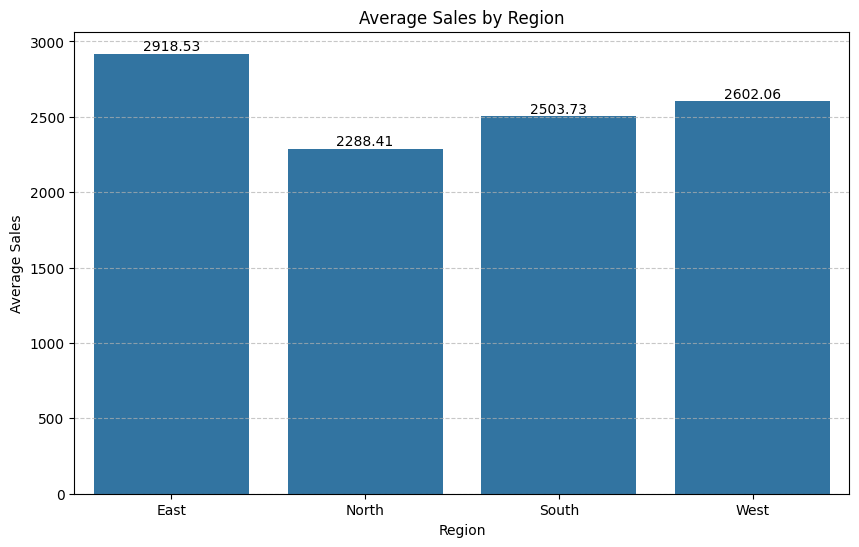

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

average_sales_by_region = SDwithissues.groupby('Region')['Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Region', y='Sales', data=average_sales_by_region)
plt.title('Average Sales by Region')
plt.xlabel('Region')
plt.ylabel('Average Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

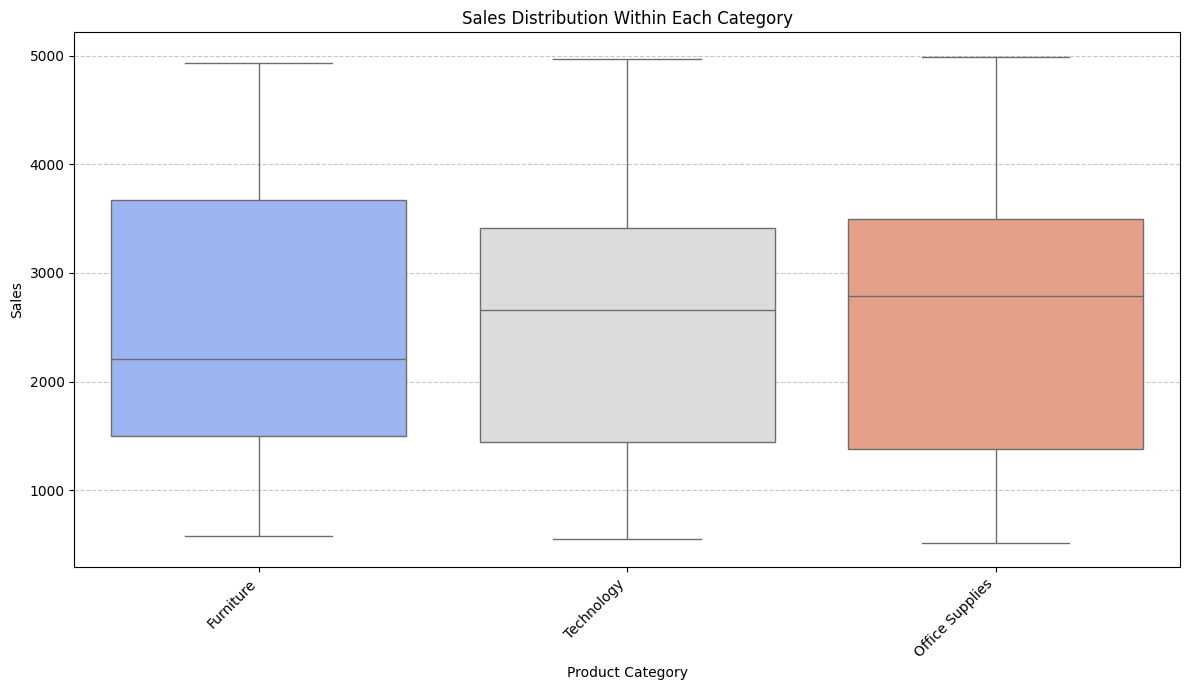

In [66]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Category', y='Sales', data=SDwithissues, palette='coolwarm', hue='Category', legend=False)
plt.title('Sales Distribution Within Each Category')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

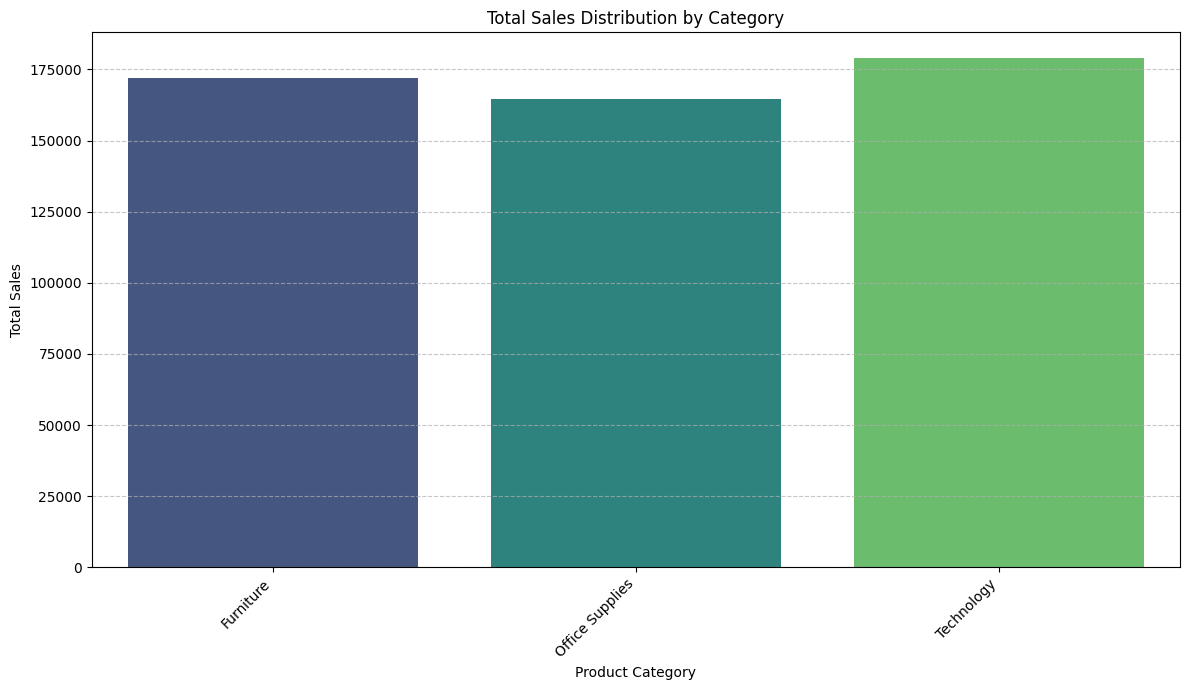

In [65]:
sales_by_category = SDwithissues.groupby('Category')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='Category', y='Sales', data=sales_by_category, palette='viridis', hue='Category', legend=False)
plt.title('Total Sales Distribution by Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [69]:
# Ensure 'Date' column is in datetime format
SDwithissues['Date'] = pd.to_datetime(SDwithissues['Date'])

# Extract date-based numerical features
SDwithissues['Year'] = SDwithissues['Date'].dt.year
SDwithissues['Month'] = SDwithissues['Date'].dt.month
SDwithissues['Day'] = SDwithissues['Date'].dt.day
SDwithissues['DayOfWeek'] = SDwithissues['Date'].dt.dayofweek # Monday=0, Sunday=6

# Display the DataFrame with new features
display(SDwithissues.head())

,Date,Region,Category,Sales,Year,Month,Day,DayOfWeek
0,2023-06-21,North,Furniture,575.07,2023,6,21,2
1,2023-07-17,North,Furniture,1537.26,2023,7,17,0
2,2023-07-28,East,Technology,1543.61,2023,7,28,4
3,2023-10-04,South,Technology,1441.21,2023,10,4,2
4,2023-06-07,East,Office Supplies,4923.52,2023,6,7,2


In [70]:
# Calculate the correlation between 'Sales' and all numerical columns
numerical_cols = ['Sales', 'Year', 'Month', 'Day', 'DayOfWeek']
correlation_matrix = SDwithissues[numerical_cols].corr()

# Display the correlation matrix, focusing on 'Sales' correlations
display(correlation_matrix[['Sales']].sort_values(by='Sales', ascending=False))

,Sales
Sales,1.000000
Month,0.033865
DayOfWeek,-0.053059
Day,-0.077588
Year,NaN


The correlation matrix above shows the relationship between 'Sales' and the newly created date-based features (Year, Month, Day, DayOfWeek).

*   **Correlation values range from -1 to 1:**
    *   `1` indicates a perfect positive linear relationship (as one variable increases, the other also increases proportionally).
    *   `-1` indicates a perfect negative linear relationship (as one variable increases, the other decreases proportionally).
    *   `0` indicates no linear relationship.

From the output, you can observe how much 'Sales' tend to change with changes in the 'Year', 'Month', 'Day', and 'DayOfWeek'. A correlation close to 0 suggests a very weak linear relationship, while values closer to 1 or -1 suggest stronger relationships.

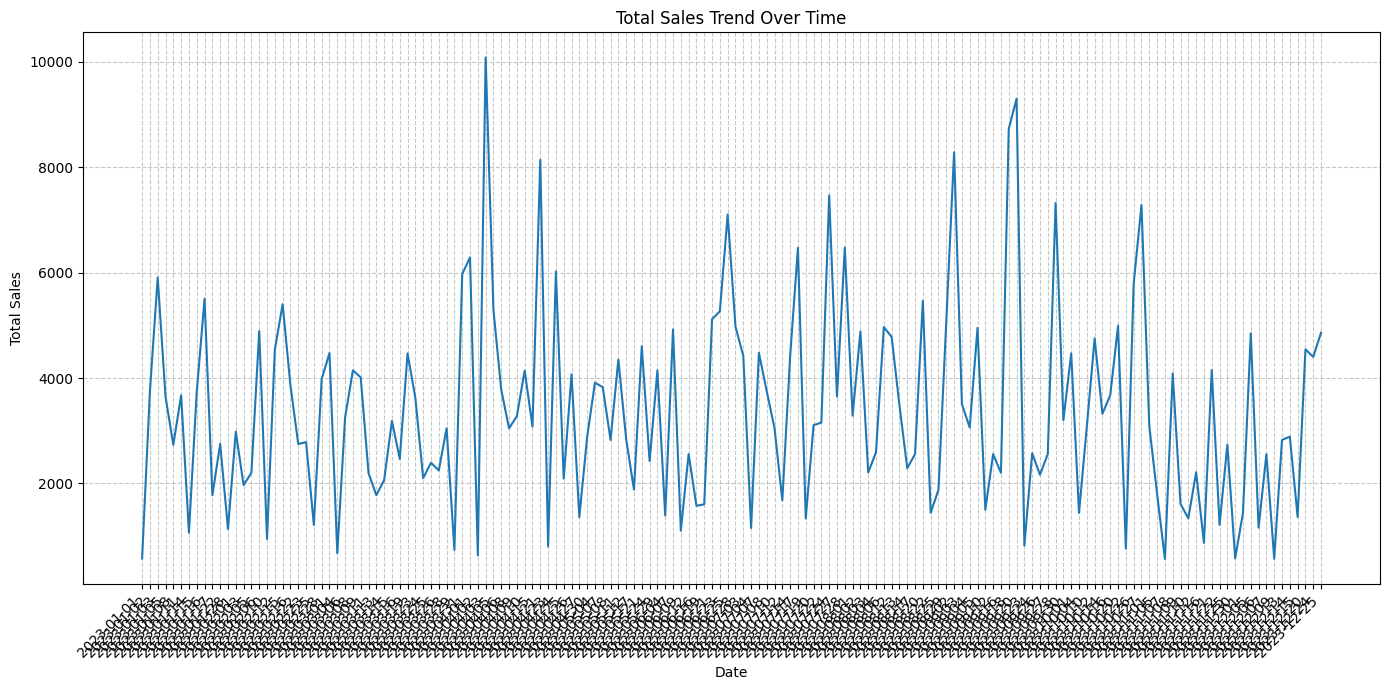

In [68]:
daily_sales = SDwithissues.groupby('Date')['Sales'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Sales', data=daily_sales)
plt.title('Total Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [71]:
# Data Aggregration -- means Grouping and calculating the data

SDwithissues.groupby('Region')['Sales'].sum()

,Sales
Region,
East,131333.86725
North,130439.34725
South,120178.83450
West,122296.98725


In [72]:
SDwithissues.groupby('Region')['Sales'].max()

,Sales
Region,
East,4968.92
North,4891.86
South,4991.91
West,4605.65


In [74]:
SDwithissues.groupby('Category')['Sales'].max()

,Sales
Category,
Furniture,4933.71
Office Supplies,4991.91
Technology,4968.92


In [75]:
SDwithissues.groupby('Category')['Sales'].mean()

,Sales
Category,
Furniture,2492.158946
Office Supplies,2614.104444
Technology,2633.739691


In [76]:
# Adding new column in the dataset

SDwithissues['New Column'] = "Random"

In [77]:
SDwithissues

,Date,Region,Category,Sales,Year,Month,Day,DayOfWeek,New Column
0,2023-06-21,North,Furniture,575.07000,2023,6,21,2,Random
1,2023-07-17,North,Furniture,1537.26000,2023,7,17,0,Random
2,2023-07-28,East,Technology,1543.61000,2023,7,28,4,Random
3,2023-10-04,South,Technology,1441.21000,2023,10,4,2,Random
4,2023-06-07,East,Office Supplies,4923.52000,2023,6,7,2,Random
...,...,...,...,...,...,...,...,...,...
195,2023-09-24,South,Office Supplies,2572.64000,2023,9,24,6,Random
196,2023-02-23,North,Office Supplies,2785.34000,2023,2,23,3,Random
197,2023-09-12,South,Technology,2558.98725,2023,9,12,1,Random
198,2023-11-01,West,Technology,3092.66000,2023,11,1,2,Random


<Axes: xlabel='Category'>

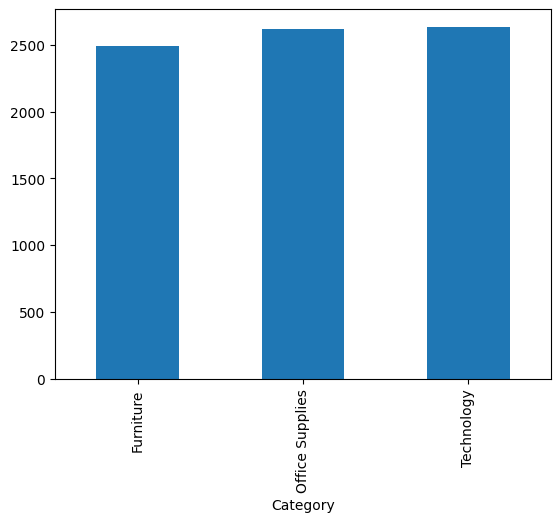

In [79]:
average_sales_by_category = SDwithissues.groupby('Category')['Sales'].mean()

average_sales_by_category.plot(kind="bar")

<Axes: ylabel='Sales'>

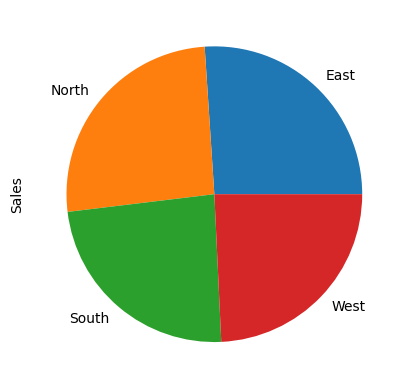

In [80]:
sales_by_region = SDwithissues.groupby('Region')['Sales'].sum()
sales_by_region.plot(kind='pie')